<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/NumM%C3%A9dicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')

In [4]:
data = data[['Município', 'Codigo_IBGE', 'Médicos']]
data.head()

,Município,Codigo_IBGE,Médicos
0,ADAMANTINA,3500105,0
1,ADOLFO,3500204,0
2,AGUAÍ,3500303,0
3,ÁGUAS DA PRATA,3500402,0
4,ÁGUAS DE LINDÓIA,3500501,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Município    645 non-null    object
 1   Codigo_IBGE  645 non-null    int64 
 2   Médicos      645 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.2+ KB


##Proposta de discretização por quartis

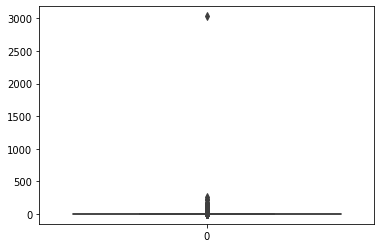

In [6]:
# plt.figure(figsize=(10,5))
sns.boxplot(data=data['Médicos'])

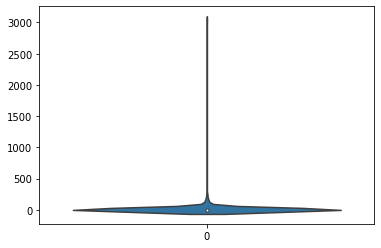

In [8]:
sns.violinplot(data=data['Médicos'])

In [7]:
data['Médicos'].describe()

count     645.000000
mean       10.275969
std       121.769388
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3033.000000
Name: Médicos, dtype: float64

Criando um subframe desconsiderando as cidades com zero médicos

In [11]:
semZeros = data[data['Médicos'] > 0]
semZeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 18 to 640
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Município    99 non-null     object
 1   Codigo_IBGE  99 non-null     int64 
 2   Médicos      99 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [14]:
semZeros['Médicos'].describe()

count      99.000000
mean       66.949495
std       305.952190
min         1.000000
25%         3.000000
50%        13.000000
75%        42.500000
max      3033.000000
Name: Médicos, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


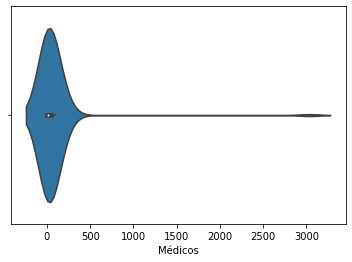

In [13]:
sns.violinplot(semZeros['Médicos'])

##Proposta de discretização:
* 0 médicos: "Zero Médicos"
* (0, 3]: "Baixo"
* (3, 13]: "Médio"
* (13, 43]: "Alto"
* Acima de 43: "Muito Alto"

In [16]:
bins = (-1, 0, 3, 13, 43, data['Médicos'].max())
labels = ['Zero Médicos', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação #Médicos'] = pd.cut(data['Médicos'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Médicos,Classificação #Médicos
0,ADAMANTINA,3500105,0,Zero Médicos
1,ADOLFO,3500204,0,Zero Médicos
2,AGUAÍ,3500303,0,Zero Médicos
3,ÁGUAS DA PRATA,3500402,0,Zero Médicos
4,ÁGUAS DE LINDÓIA,3500501,0,Zero Médicos
...,...,...,...,...
640,VOTORANTIM,3557006,8,Médio
641,VOTUPORANGA,3557105,0,Zero Médicos
642,ZACARIAS,3557154,0,Zero Médicos
643,CHAVANTES,3557204,0,Zero Médicos


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Município               645 non-null    object  
 1   Codigo_IBGE             645 non-null    int64   
 2   Médicos                 645 non-null    int64   
 3   Classificação #Médicos  645 non-null    category
dtypes: category(1), int64(2), object(1)
memory usage: 16.1+ KB


###Histograma da distribuição

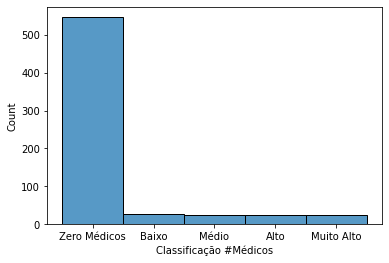

In [17]:
sns.histplot(data=data['Classificação #Médicos'])